In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ry1g2m1t
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-ry1g2m1t
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=82437 sha256=540bfbe9bb1cb0498ba5bdcd5e656ed7d83d07b2354380d15428b586e557458d
  Stored in directory: /tmp/pip-ephem-wheel-cache-44n1c1px/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
import matplotlib.pyplot as plt
import os
import glob
import natsort
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("tf version =",tf.__version__)


tf version = 2.2.0-rc3


In [ ]:
pickle_in = open('/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Datasets/X_train_28x28.pickle','rb')
X_train = pickle.load(pickle_in)

pickle_in = open('/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Datasets/X_test_28x28.pickle','rb')
X_test = pickle.load(pickle_in)

In [ ]:
size = (28,28) 

X_train = X_train.reshape(-1, size[0], size[1],1)
X_test = X_test.reshape(-1, size[0], size[1],1)
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[1:])

(54000, 28, 28, 1)
(6000, 28, 28, 1)
(28, 28, 1)


In [ ]:
input_img = layers.Input(shape = X_train.shape[1:])

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 4, 4, 8)           0  

In [ ]:
epochs = 1
batch_size = 128

autoencoder.fit(
  X_train, X_train, batch_size = batch_size,
  epochs = epochs, validation_split = 0.1, verbose=1)


380/380 [==============================] - 2s 6ms/step - loss: 0.2587 - val_loss: 0.2590


In [ ]:
#autoencoder.save('/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Models/autoencoder28x28')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Models/autoencoder28x28/assets


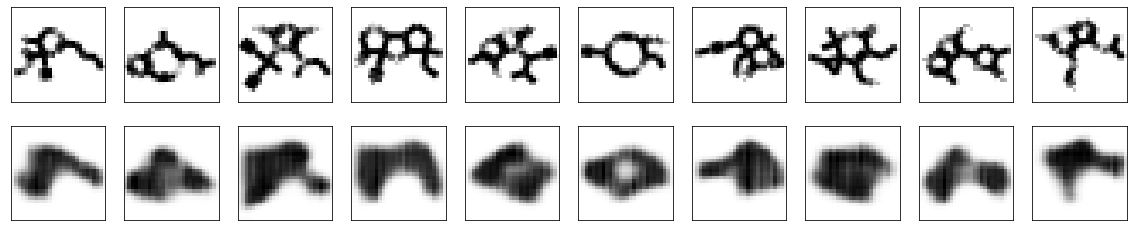

In [ ]:
decoded_imgs = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(size))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(size))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()